**Author Name:** Rizwan Rizwan\
**Submission Data:** 24/10/2024

# Data Visualization on 'New York City Airbnb Open Data' using `Seaborn`

- The dataset can be downloaded from kaggle [link](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

## About Dataset

The dataset provides information on Airbnb listings in New York City. Here's a brief overview of the columns:

- **id:** Unique identifier for the listing.
- **name:** Name of the listing.
- **host_id:** Unique identifier for the host.
- **host_name:** Name of the host.
- **neighbourhood_group:** Borough where the listing is located (e.g., Manhattan, Brooklyn).
- **neighbourhood:** Specific neighborhood within the borough.
- **latitude:** Latitude of the listing.
- **longitude:** Longitude of the listing.
- **room_type:** Type of room (e.g., Entire home/apt, Private room).
- **price:** Price per night for the listing.
- **minimum_nights:** Minimum nights required for booking.
- **number_of_reviews:** Total number of reviews the listing has received.
- **last_review:** Date of the last review.
- **reviews_per_month:** Average number of reviews the listing gets per month.
- **calculated_host_listings_count**: Number of listings the host has in total.
- **availability_365:** Number of days the listing is available in a year.

**Plot 1: Scatter plot** 
- Let's start with a scatter plot to visualize the distribution of listings based on their latitude and longitude, giving us an idea of their geographical distribution across NYC.​

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv('./data/NY City Airbnb.csv')

### Plot 1: Scatter plot

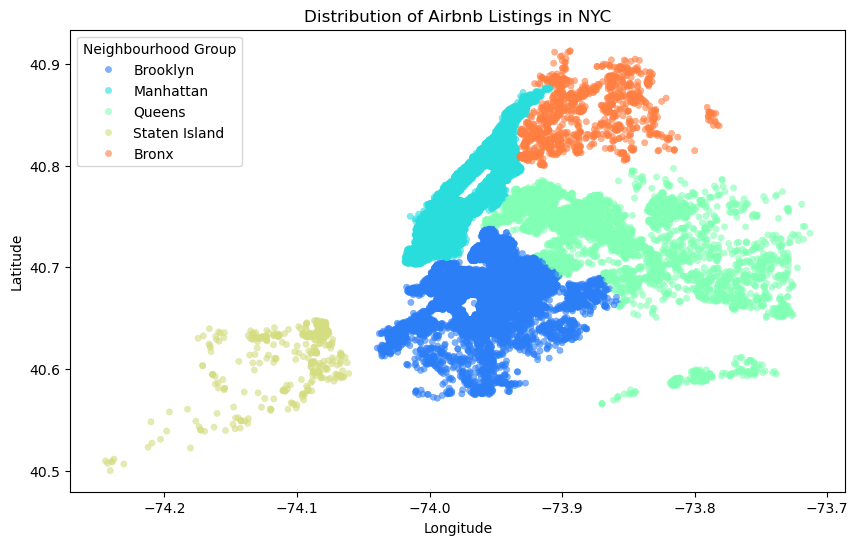

In [3]:
# Scatter plot for latitude vs longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'], palette='rainbow', alpha=0.6, edgecolor=None, s=20)

# set the x-axis and y-axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# set the title of the plot
plt.title('Distribution of Airbnb Listings in NYC')

# save the plot to a file
plt.savefig('./outputs/plots/scatter_plot.png', dpi=300, bbox_inches='tight')

# set the legend
plt.legend(title='Neighbourhood Group')

# show the plot
plt.show()

**Scatter Plot Interpretation:**

- The scatter plot visualizes the distribution of Airbnb listings across New York City based on their latitude and longitude.
- Each point represents a listing, and the color indicates the borough (neighbourhood group) in which the listing is located. 
- We can observe clusters, notably in Manhattan and Brooklyn, suggesting a high concentration of listings in these areas.

### Plot 2: Boxplot 
- Let's visualize the distribution of prices across different room types using a boxplot. This will give us an idea about the price range and potential outliers for each room type.​

C:\Users\Tesla Laptops\AppData\Local\Temp\ipykernel_11228\3763924668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['room_type'], y=df['price'], palette='pastel')


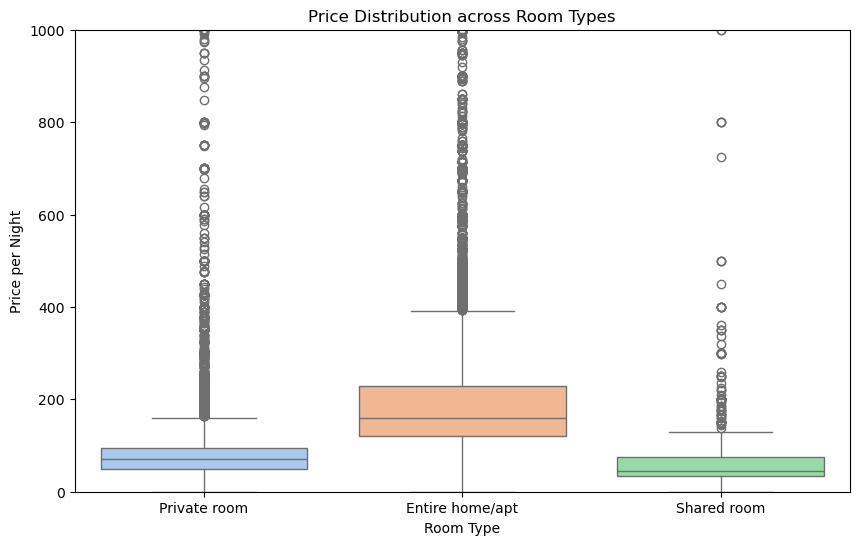

In [4]:
# Boxplot for room type vs price
plt.figure(figsize=(10, 6))

# Plotting the boxplot
sns.boxplot(x=df['room_type'], y=df['price'], palette='pastel')

# Set the x-axis and y-axis labels
plt.xlabel('Room Type')
plt.ylabel('Price per Night')

# Set the title of the plot
plt.title('Price Distribution across Room Types')

# Limiting the y-axis to remove extreme outliers for better visualization
plt.ylim(0, 1000)  

# Save the plot to a file
plt.savefig('./outputs/plots/boxplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**Boxplot Interpretation:**

The boxplot showcases the distribution of prices across different room types. The following observations can be made:

- "Entire home/apt" generally has higher prices compared to other room types, with a broader interquartile range (IQR).
- "Private room" and "Shared room" have relatively lower median prices.
- There are several outliers in the "Entire home/apt" and "Private room" categories, indicating listings with unusually high prices

**Plot 3: Histogram**
- Let's visualize the distribution of prices across all listings with a histogram. This will give us an idea about the frequency of listings in different price ranges.​

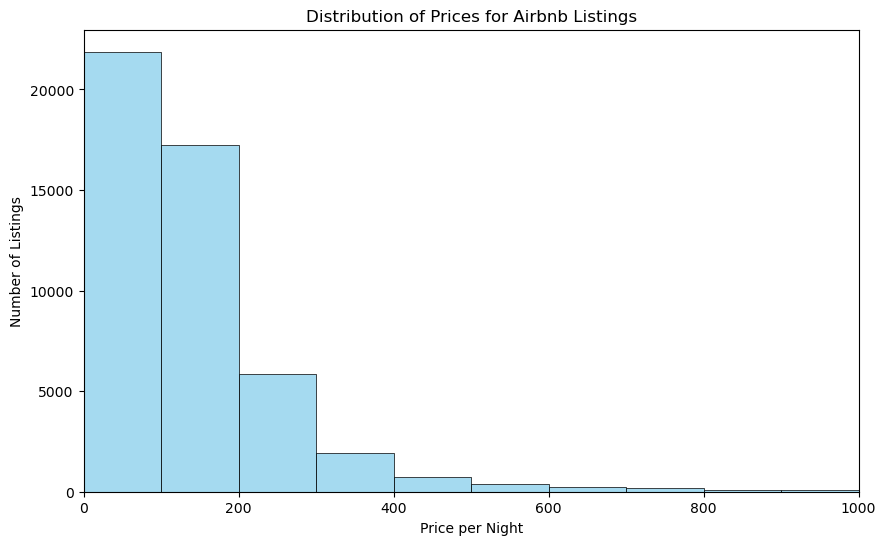

In [5]:
# Histogram for price distribution

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the histogram
sns.histplot(data=df, x='price', bins=100, color='skyblue')

# Set the x-axis and y-axis labels
plt.xlabel('Price per Night')
plt.ylabel('Number of Listings')

# Set the title of the plot
plt.title('Distribution of Prices for Airbnb Listings')

# save the plot to a file
plt.savefig('./outputs/plots/histogram.png', dpi=300, bbox_inches='tight')

# Limiting the x-axis to remove extreme values for better visualization
plt.xlim(0, 1000)  

plt.show()

**Histogram Interpretation:**

The histogram illustrates the distribution of prices for Airbnb listings in New York City. We can observe:

- A majority of listings are priced between $0 and $200.
- The frequency of listings decreases as the price increases, indicating fewer high-priced listings.
- There is a noticeable peak around $0-100, suggesting this range is popular for Airbnb listings in NYC.

### Plot 4: Heatmap 
- We'll visualize the correlation between numerical columns in the dataset using a heatmap. This will help us understand the relationships between various features.​

C:\Users\Tesla Laptops\AppData\Local\Temp\ipykernel_11228\1106549049.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


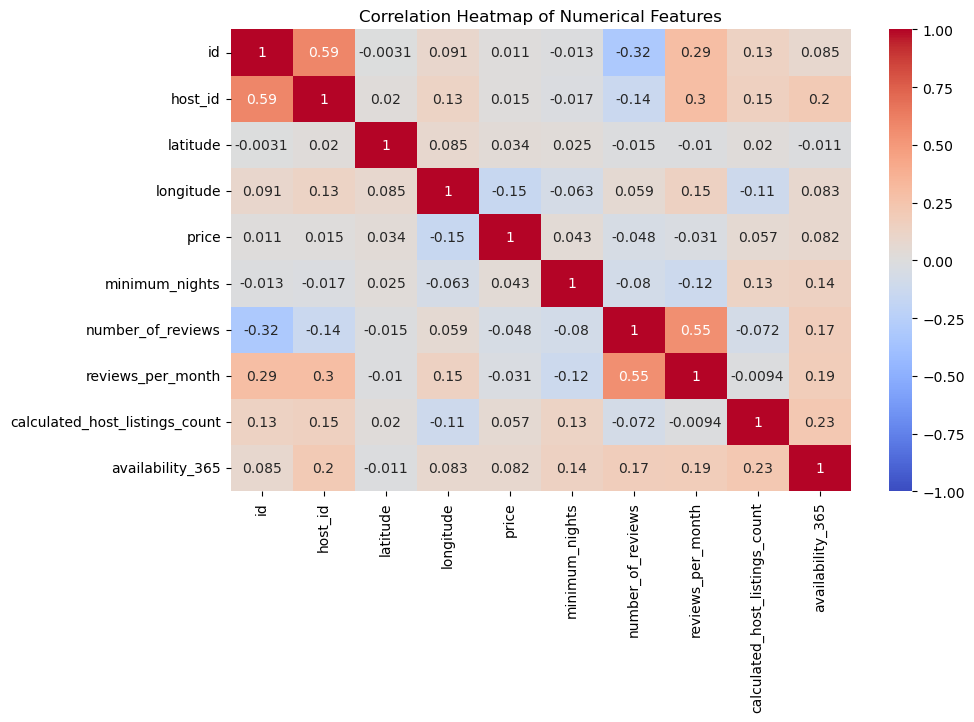

In [6]:
# Compute correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title of the plot
plt.title('Correlation Heatmap of Numerical Features')

# Save the plot to a file
plt.savefig('./outputs/plots/heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**Heatmap Interpretation:**

The heatmap shows the correlation coefficients between the numerical features of the dataset:

- reviews_per_month and number_of_reviews have a strong positive correlation, which is expected since listings with more reviews over time will likely have a higher monthly review rate.
- availability_365 has a slight positive correlation with number_of_reviews, suggesting that listings that are available more frequently might have fewer reviews.
- Other features do not show strong correlations.

### Plot 5: Area Chart
- Let's visualize the trend of average prices over different minimum nights using an area chart. This will give us an idea of how price varies with the minimum number of nights required for booking.​

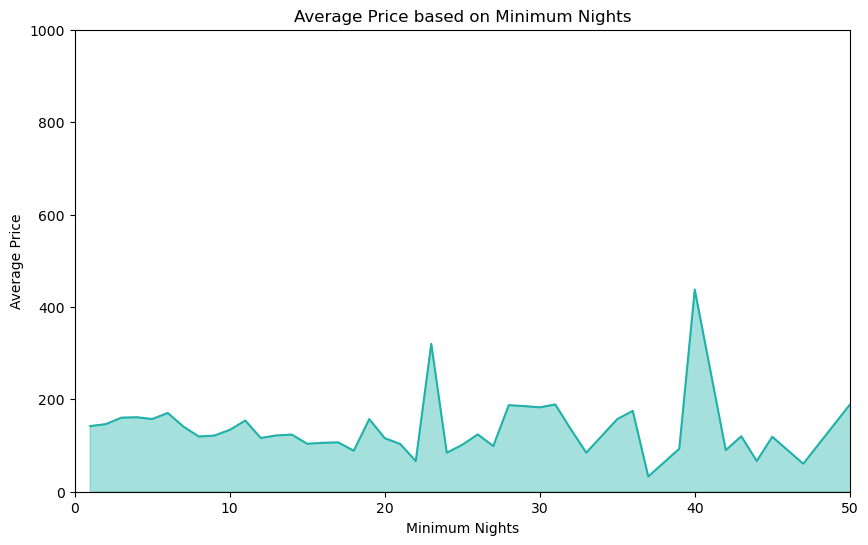

In [8]:
# Grouping data by minimum_nights and calculating average price
avg_price_per_night = df.groupby('minimum_nights')['price'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting area chart
plt.fill_between(avg_price_per_night['minimum_nights'], avg_price_per_night['price'], color='lightseagreen', alpha=0.4)
plt.plot(avg_price_per_night['minimum_nights'], avg_price_per_night['price'], color='lightseagreen')

# Set the x-axis and y-axis labels
plt.xlabel('Minimum Nights')
plt.ylabel('Average Price')

# Set the title of the plot
plt.title('Average Price based on Minimum Nights')

# Limiting x-axis and y-axis for better visualization
plt.xlim(0, 50)
plt.ylim(0,1000)

# Save the plot to a file
plt.savefig('./outputs/plots/area_chart.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

**Area Chart Interpretation:**

The area chart presents the trend of average prices based on the minimum number of nights required for booking:

- For listings requiring only 1 or 2 nights, the average price is relatively low.
- As the minimum nights required increase, there's some fluctuation in the average price.
- Around 20-30 nights, there's a noticeable peak, suggesting that listings with longer minimum stays might be priced higher on average. However, it's essential to be cautious in drawing conclusions, as there might be fewer listings in these categories, affecting the average.

### Plot 6: Spider (Radar) Chart 
We'll visualize the average prices across different neighbourhood groups using a spider chart. This will provide a comparative view of average prices across different boroughs.

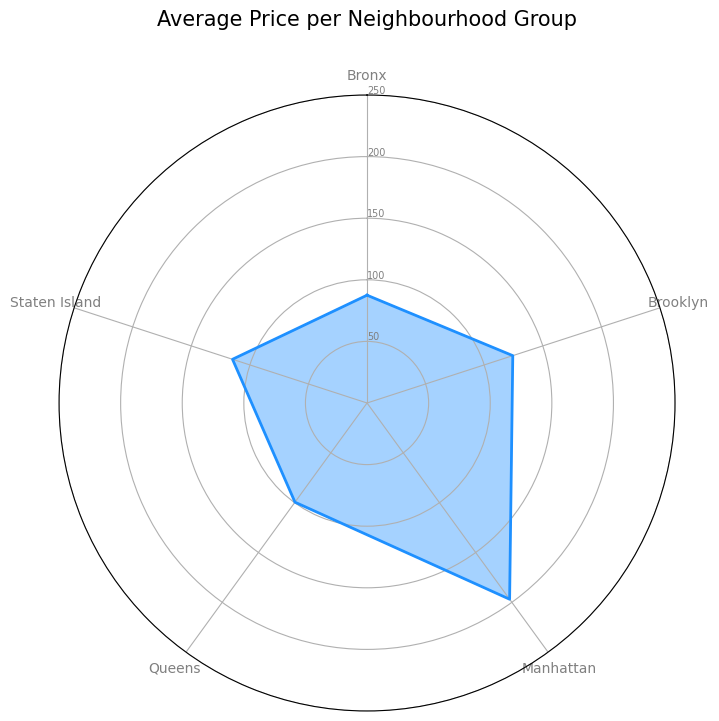

In [9]:
from math import pi

# Grouping data by neighbourhood_group and calculating average price
avg_price_per_group = df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Number of variables
categories = avg_price_per_group['neighbourhood_group'].tolist()
N = len(categories)

# Calculate the angle for each category
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Set the first axis on top
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='grey', size=10)

# Draw the background for each axis
ax.set_rlabel_position(0)
plt.yticks([50, 100, 150, 200, 250], ["50", "100", "150", "200", "250"], color="grey", size=7)
plt.ylim(0, 250)

# Plot data
values = avg_price_per_group['price'].tolist()
values += values[:1]
ax.plot(angles, values, color='dodgerblue', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='dodgerblue', alpha=0.4)

# Title
plt.title('Average Price per Neighbourhood Group', size=15, color='black', y=1.1)

# Save the plot to a file
plt.savefig('./outputs/plots/radar_chart.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


**Spider Chart Interpretation:**
The spider (or radar) chart offers a comparative view of average prices across different NYC boroughs:

- Manhattan has the highest average price among all the neighbourhood groups.
- Brooklyn and Staten Island have somewhat similar average prices, although Brooklyn's is slightly higher.
- The Bronx and Queens have the lowest average prices among the boroughs, with Queens being a bit higher than the Bronx.

### Plot 7. Pie Chart

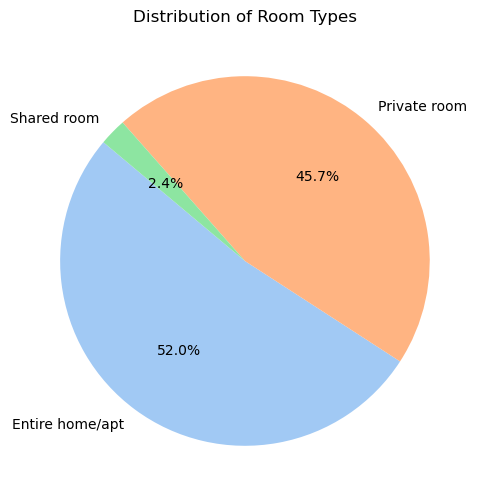

In [10]:
# Count the number of each room type
room_type_counts = df['room_type'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the pie chart
plt.pie(room_type_counts.values, labels=room_type_counts.index, colors=sns.color_palette('pastel', len(room_type_counts)), autopct='%1.1f%%', startangle=140)

# Set the title of the plot
plt.title('Distribution of Room Types')

# Save the plot to a file
plt.savefig('./outputs/plots/pie_chart.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

**Pie Chart Interpretation:** 
- The majority of listings are either for "Entire home/apt" or "Private room", with "Entire home/apt" being the most popular room type.

In [12]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Plot 8. Line Chart: 
We'll visualize the average price of listings across different neighbourhood groups.

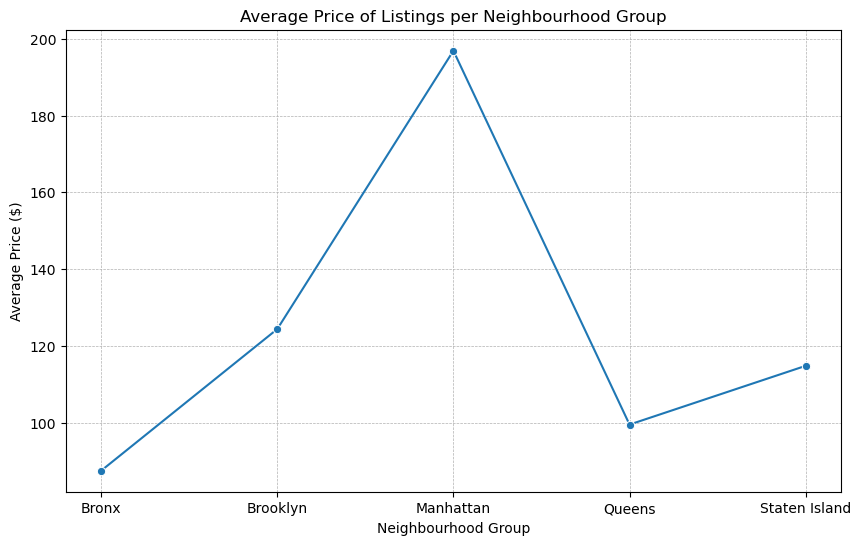

In [13]:
# Data preparation for the line chart
avg_prices = df.groupby('neighbourhood_group')['price'].mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Line Chart: Average price over neighbourhood groups
sns.lineplot(x=avg_prices.index, y=avg_prices.values, marker='o')

# Set the x-axis and y-axis labels
plt.ylabel('Average Price ($)')
plt.xlabel('Neighbourhood Group')

# Set the title of the plot
plt.title('Average Price of Listings per Neighbourhood Group')

# Save the plot to a file
plt.savefig('./outputs/plots/line_chart.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The line chart displays the average listing prices for each neighbourhood group in New York City.

**Line Chart Interpretation:**

- Manhattan appears to have the highest average listing price, which could reflect the premium nature of accommodations in this central and iconic part of the city. 
- Other neighbourhoods show varying average prices, with certain areas potentially being more affordable for guests.

### Plot 9. Bar Chart:
let's create the bar chart to represent the number of listings per neighbourhood group.​

C:\Users\Tesla Laptops\AppData\Local\Temp\ipykernel_11228\3459901936.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




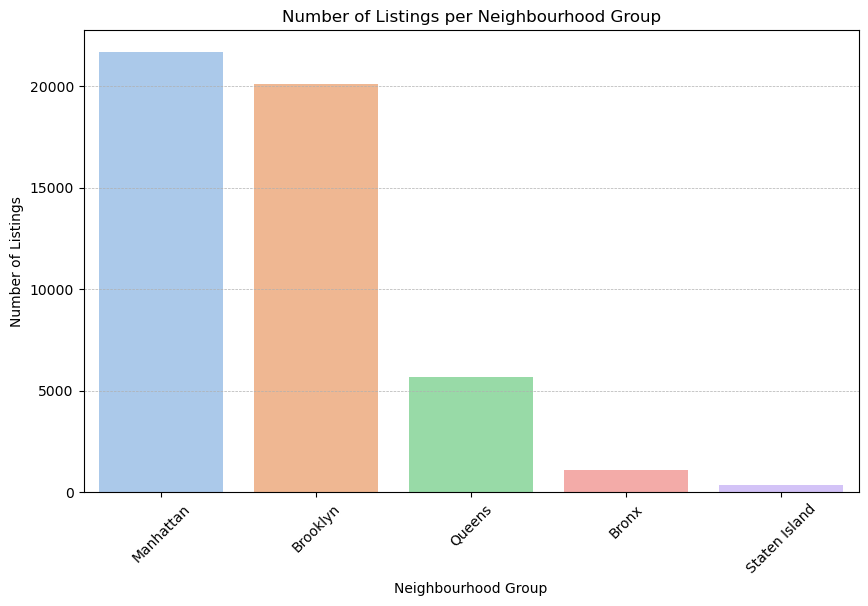

In [15]:
# Bar Chart: Number of listings per neighbourhood group
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the bar chart
sns.countplot(data=df, x='neighbourhood_group', palette='pastel', order=df['neighbourhood_group'].value_counts().index)

# Set the x-axis and y-axis labels
plt.ylabel('Number of Listings')
plt.xlabel('Neighbourhood Group')

# Set the title of the plot
plt.title('Number of Listings per Neighbourhood Group')

# Save the plot to a file
plt.savefig('./outputs/plots/bar_chart.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.xticks(rotation=45) # Rotating the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5) # Adding gridlines
plt.show()

**Barplot Interpretation**

- The bar chart presents the distribution of Airbnb listings across different neighbourhood groups in New York City.
- Manhattan and Brooklyn dominate the Airbnb listings, indicating their popularity among hosts and guests. 
- Other neighbourhood groups have fewer listings, suggesting they might be less frequented or have fewer accommodations available for Airbnb.

### Plot 10. Treemap:

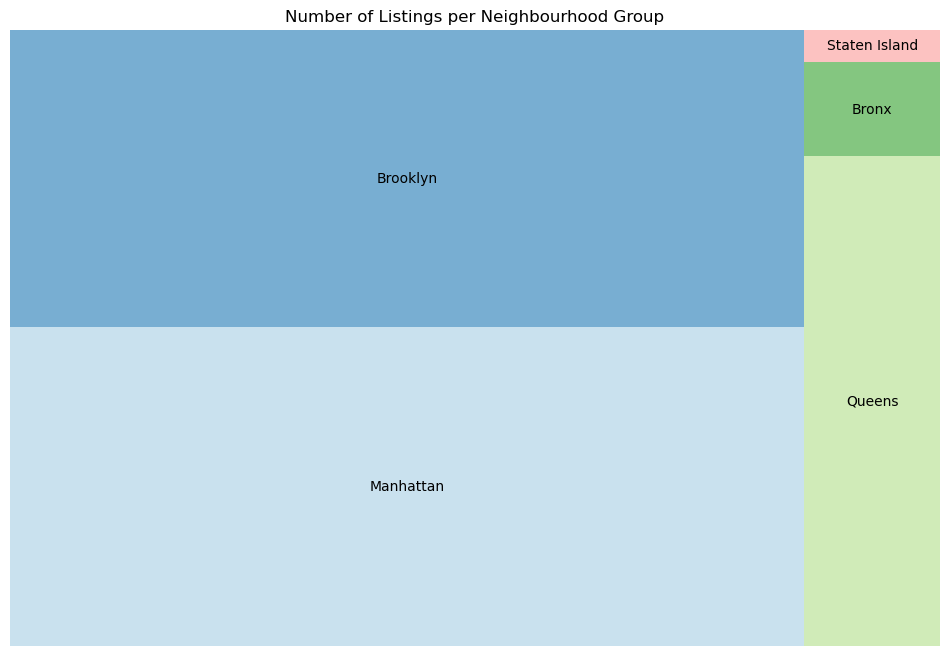

In [17]:
import squarify as sq
neighbourhood_counts = df['neighbourhood_group'].value_counts()

# Create a color palette
colors = plt.cm.Paired(range(len(neighbourhood_counts)))

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the treemap
sq.plot(sizes=neighbourhood_counts.values, label=neighbourhood_counts.index, color=colors, alpha=0.6)

# Set the title of the plot
plt.title('Number of Listings per Neighbourhood Group')
plt.axis('off')

# Save the plot to a file
plt.savefig('./outputs/plots/treemap.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

**Treemap Interpretation:**

- The treemap provides a visual representation of the number of Airbnb listings across different neighbourhood groups in New York City. 
- Each colored block represents a neighbourhood group, with the size of the block corresponding to the number of listings in that group.
-  Larger blocks indicate neighbourhood groups with more listings, suggesting they are popular among hosts and guests. 
-  On the other hand, smaller blocks represent less frequented neighbourhoods or areas with fewer accommodations available for Airbnb.